In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tdc123","key":"7f44ddd8a54839947222e513bfdbee58"}'}

In [ ]:
# The Kaggle API client expects this file to be in ~/.kaggle,
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 96% 259M/271M [00:02<00:00, 105MB/s]
100% 271M/271M [00:02<00:00, 108MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 89.7MB/s]
 97% 529M/543M [00:09<00:00, 56.9MB/s]
100% 543M/543M [00:09<00:00, 62.5MB/s]


In [ ]:
!unzip '/content/train.zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       
  inflating: train/dog.5520.jpg

In [ ]:
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random

# create directories
dataset_home = '/content/cats_and_dogs_filtered/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
# copy training dataset images into subdirectories
src_directory = '/content/train/'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, BatchNormalization, Input, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers.core import Flatten, Dense, Dropout
from keras.optimizers import SGD
import numpy as np
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.models import Model
from keras.utils.data_utils import get_file
from keras.applications.vgg16 import preprocess_input

In [ ]:
img_input = Input(shape=(224, 224, 3))

x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), padding='same', activation='relu', name='block1_conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block1_pool')(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), padding='same', activation='relu', name='block2_conv2')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block2_pool')(x)

x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), padding='same', activation='relu', name='block3_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block3_pool')(x)

x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block4_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block4_pool')(x)

x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), padding='same', activation='relu', name='block5_conv3')(x)
x = MaxPool2D((2, 2), strides=(2, 2), name='block5_pool')(x)

x = Flatten()(x)
x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(4096, activation='relu', name='fc2')(x)
x = Dense(1000, activation='softmax', name='output')(x)

base_model = Model(img_input, x)

In [ ]:
TF_WEIGHTS_PATH_NO_TOP = ('https://github.com/fchollet/deep-learning-models/'
                          'releases/download/v0.1/'
                          'vgg16_weights_tf_dim_ordering_tf_kernels.h5')
weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        TF_WEIGHTS_PATH_NO_TOP,
                        cache_subdir='models',
                        file_hash='6d6bbae143d832006294945121d1f1fc')
base_model.load_weights(weights_path)

553467904/553467096 [==============================] - 36s 0us/step


In [ ]:
def define_model():
  # load model
  model = base_model
  # mark loaded layers as not trainable
  for layer in model.layers:
    layer.trainable = False
  # add new classifier layers
  flat1 = Flatten()(model.layers[-1].output)
  class1 = Dense(4096, activation='relu', kernel_initializer='he_uniform')(flat1)
  output = Dense(1, activation='sigmoid')(class1)
  # define new model
  model = Model(inputs=model.inputs, outputs=output)
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
def_model = define_model()

In [ ]:
def_model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
'''
def run():
	# define model
	model = define_model() 
 	# create data generator
	datagen = ImageDataGenerator(featurewise_center=True)
	# specify imagenet mean values for centering
	datagen.mean = [123.68, 116.779, 103.939]
	# prepare iterator
	train_it = datagen.flow_from_directory('/content/cats_and_dogs_filtered/train/',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	test_it = datagen.flow_from_directory('/content/cats_and_dogs_filtered/test',
		class_mode='binary', batch_size=64, target_size=(224, 224))
	# fit model
	history = model.fit_generator(train_it, steps_per_epoch=len(train_it),
		validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1)

# entry point, run the test harness
run()
'''

data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)
IMG_SIZE = 224
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

train_generator = data_generator.flow_from_directory(
        '/content/cats_and_dogs_filtered/train/',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '/content/cats_and_dogs_filtered/test/',
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical')

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = 3)
cb_checkpointer = ModelCheckpoint(filepath = '/content/best_vgg16.h5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [ ]:
# define model
model = define_model() 
# create data generator
datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
# prepare iterator
train_it = datagen.flow_from_directory('/content/cats_and_dogs_filtered/train/', class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory('/content/cats_and_dogs_filtered/test', class_mode='binary', batch_size=64, target_size=(224, 224))
# fit model
hist = model.fit_generator(train_it, steps_per_epoch=len(train_it), validation_data=test_it, validation_steps=len(test_it), epochs=10, verbose=1, callbacks=[cb_checkpointer, cb_early_stopper])

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
293/293 [==============================] - 182s 622ms/step - loss: 0.6622 - accuracy: 0.8558 - val_loss: 0.6332 - val_accuracy: 0.8945
Epoch 2/10
293/293 [==============================] - 179s 611ms/step - loss: 0.6044 - accuracy: 0.8980 - val_loss: 0.5784 - val_accuracy: 0.8896
Epoch 3/10
293/293 [==============================] - 179s 611ms/step - loss: 0.5506 - accuracy: 0.8991 - val_loss: 0.5270 - val_accuracy: 0.8896
Epoch 4/10
293/293 [==============================] - 179s 610ms/step - loss: 0.5005 - accuracy: 0.8986 - val_loss: 0.4796 - val_accuracy: 0.8918
Epoch 5/10
293/293 [==============================] - 179s 611ms/step - loss: 0.4548 - accuracy: 0.9031 - val_loss: 0.4372 - val_accuracy: 0.8902
Epoch 6/10
293/293 [==============================] - 179s 610ms/step - loss: 0.4145 - accuracy: 0.9034 - val

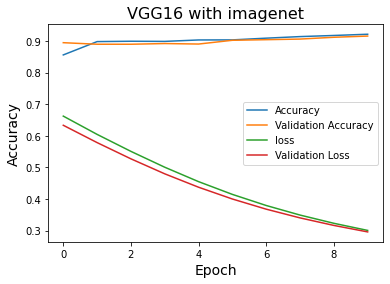

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("VGG16 with imagenet", fontsize='16')
plt.ylabel("Accuracy", fontsize='14')
plt.xlabel("Epoch", fontsize='14')
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
!unzip 'test1.zip'

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg    

In [ ]:
import glob
from random import shuffle

list_dir = glob.glob("/content/test1/*.jpg")

In [ ]:
from tensorflow.python.keras.models import load_model

model3 = load_model('/content/best_vgg16.h5')

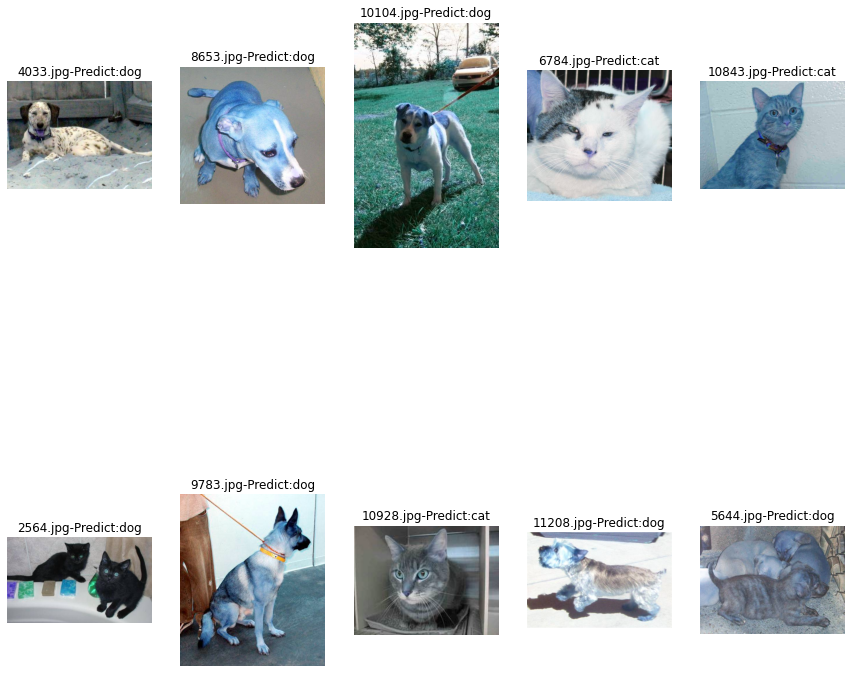

In [ ]:
import matplotlib.pyplot as plt
import cv2

IMAGE_RESIZE = 224
f, ax = plt.subplots(2, 5, figsize = (15, 15))
shuffle(list_dir)
for i in range(0,10):
    img = cv2.imread(list_dir[i])
    img2 = cv2.resize(img,(IMAGE_RESIZE,IMAGE_RESIZE))
    img2 = np.reshape(img2,[1,IMAGE_RESIZE,IMAGE_RESIZE,3])
        
    result = model3.predict(img2)

    classify = 'dog' if result[0] > 0.5 else 'cat'
    ax[i//5, i%5].imshow(img)
    ax[i//5, i%5].axis('off')
    ax[i//5, i%5].set_title("{}-Predict:{}".format(list_dir[i].replace('/content/test1/',''), classify))    

plt.show()